In [1]:
#load the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the dataset
app_data=pd.read_csv("application_data.csv")


In [3]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
app_data.isnull().sum()[0:60]

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [6]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[0:60]

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                    65.99
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

In [7]:
missing_value = pd.DataFrame((app_data.isnull().sum())*100/app_data.shape[0]).reset_index()
missing_value

,index,0
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.501631
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
119,AMT_REQ_CREDIT_BUREAU_MON,13.501631
120,AMT_REQ_CREDIT_BUREAU_QRT,13.501631


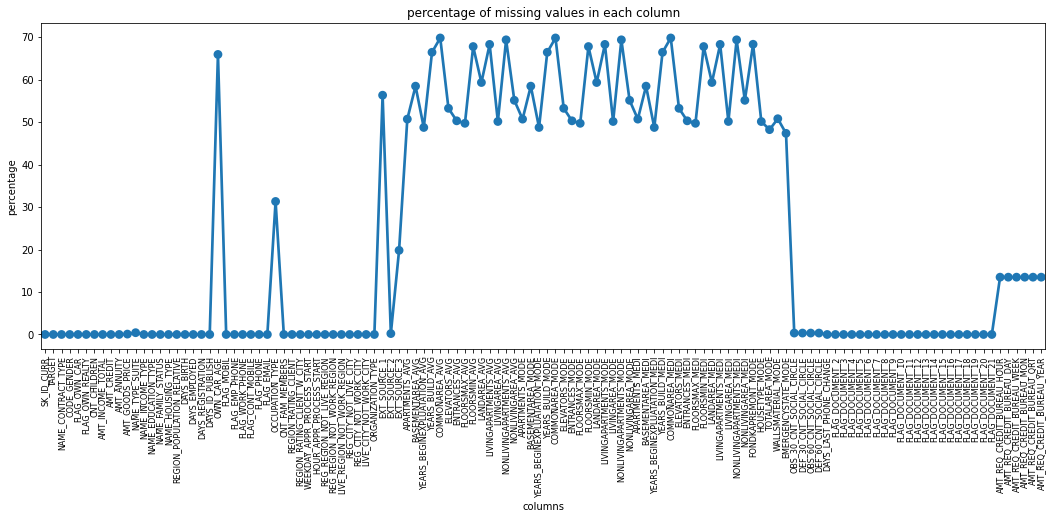

In [8]:
fig = plt.figure(figsize=(18,6))

ax=sns.pointplot(x="index",y=0,data=missing_value)
plt.xticks(rotation =90,fontsize =8)
ax.set(xlabel="columns",ylabel="percentage")
plt.title("percentage of missing values in each column")
plt.show()

In [8]:
app_data=app_data.drop('OWN_CAR_AGE',axis=1)

In [9]:
app_data=app_data.drop(['EXT_SOURCE_1','APARTMENTS_AVG'],axis=1)

In [10]:
app_data=app_data.drop(['BASEMENTAREA_AVG',               
'YEARS_BEGINEXPLUATATION_AVG',    
'YEARS_BUILD_AVG',               
'COMMONAREA_AVG',               
'ELEVATORS_AVG',                  
'ENTRANCES_AVG',                 
'FLOORSMAX_AVG',                  
'FLOORSMIN_AVG',                  
'LANDAREA_AVG',                   
'LIVINGAPARTMENTS_AVG',           
'LIVINGAREA_AVG',                 
'NONLIVINGAPARTMENTS_AVG',        
'NONLIVINGAREA_AVG',              
'APARTMENTS_MODE',                
'BASEMENTAREA_MODE'],axis=1)

In [11]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[60:120]

ENTRANCES_MEDI                50.35
FLOORSMAX_MEDI                49.76
FLOORSMIN_MEDI                67.85
LANDAREA_MEDI                 59.38
LIVINGAPARTMENTS_MEDI         68.35
LIVINGAREA_MEDI               50.19
NONLIVINGAPARTMENTS_MEDI      69.43
NONLIVINGAREA_MEDI            55.18
FONDKAPREMONT_MODE            68.39
HOUSETYPE_MODE                50.18
TOTALAREA_MODE                48.27
WALLSMATERIAL_MODE            50.84
EMERGENCYSTATE_MODE           47.40
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_7                0.00
FLAG_DOCUMENT_8                0.00
FLAG_DOCUMENT_9                0.00
FLAG_DOCUMENT_10               0.00
FLAG_DOCUMENT_11            

In [12]:
app_data=app_data.drop(['ENTRANCES_MEDI',
'FLOORSMAX_MEDI',                
'FLOORSMIN_MEDI',                
'LANDAREA_MEDI',                 
'LIVINGAPARTMENTS_MEDI',         
'LIVINGAREA_MEDI',               
'NONLIVINGAPARTMENTS_MEDI',      
'NONLIVINGAREA_MEDI',           
'FONDKAPREMONT_MODE',            
'HOUSETYPE_MODE',                
'TOTALAREA_MODE',               
'WALLSMATERIAL_MODE',           
'EMERGENCYSTATE_MODE' ],axis=1)

In [13]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[120:123]

Series([], dtype: float64)

In [14]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
app_data.shape

(307511, 91)

In [16]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[0:60]

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE                       0.00
FLAG_EMAIL  

In [17]:
app_data=app_data.drop(['YEARS_BEGINEXPLUATATION_MODE',   
'YEARS_BUILD_MODE',               
'COMMONAREA_MODE',                 
'ELEVATORS_MODE',                  
'ENTRANCES_MODE',                  
'FLOORSMAX_MODE',                  
'FLOORSMIN_MODE',                  
'LANDAREA_MODE',                   
'LIVINGAPARTMENTS_MODE',          
'LIVINGAREA_MODE',                 
'NONLIVINGAPARTMENTS_MODE',       
'NONLIVINGAREA_MODE',              
'APARTMENTS_MEDI',                 
'BASEMENTAREA_MEDI',               
'YEARS_BEGINEXPLUATATION_MEDI',    
'YEARS_BUILD_MEDI',                
'COMMONAREA_MEDI',                 
'ELEVATORS_MEDI' ],axis=1)

In [18]:
app_data.shape

(307511, 73)

In [19]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[0:60]

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [20]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[60:120]

FLAG_DOCUMENT_15               0.0
FLAG_DOCUMENT_16               0.0
FLAG_DOCUMENT_17               0.0
FLAG_DOCUMENT_18               0.0
FLAG_DOCUMENT_19               0.0
FLAG_DOCUMENT_20               0.0
FLAG_DOCUMENT_21               0.0
AMT_REQ_CREDIT_BUREAU_HOUR    13.5
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
dtype: float64

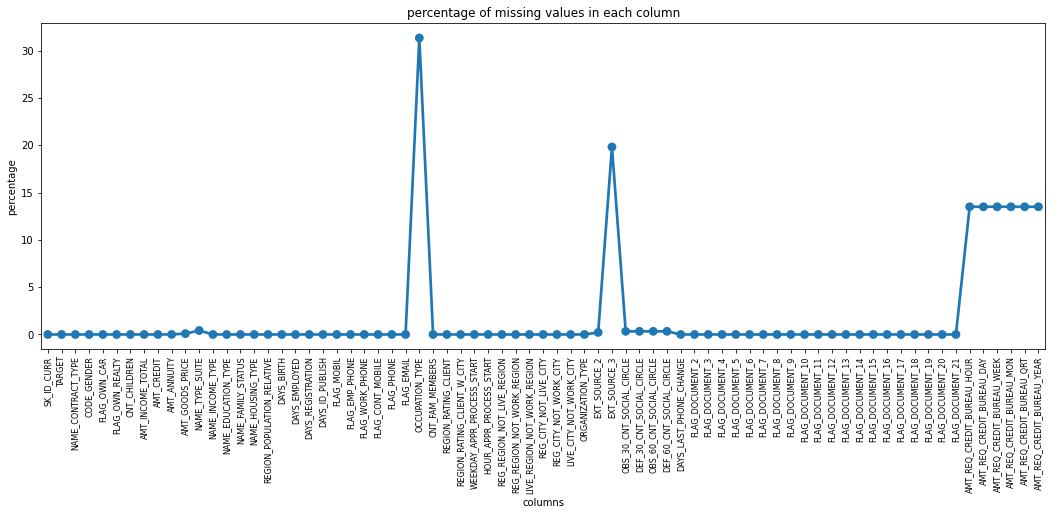

In [22]:

missing_value = pd.DataFrame((app_data.isnull().sum())*100/app_data.shape[0]).reset_index()
fig = plt.figure(figsize=(18,6))

ax=sns.pointplot(x="index",y=0,data=missing_value)
plt.xticks(rotation =90,fontsize =8)
ax.set(xlabel="columns",ylabel="percentage")
plt.title("percentage of missing values in each column")
plt.show()

In [21]:
app_data['OCCUPATION_TYPE'].describe() # it is a categorical data

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

In [22]:
app_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [23]:
aaa = pd.DataFrame(app_data['OCCUPATION_TYPE'].value_counts()).reset_index()
aaa.columns=['index','count']
aaa

,index,count
0,Laborers,55186
1,Sales staff,32102
2,Core staff,27570
3,Managers,21371
4,Drivers,18603
5,High skill tech staff,11380
6,Accountants,9813
7,Medicine staff,8537
8,Security staff,6721
9,Cooking staff,5946


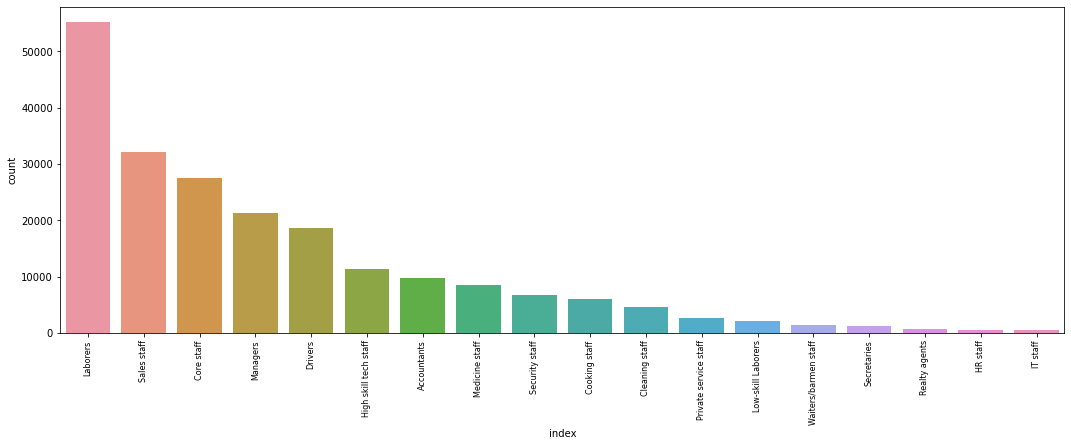

In [24]:
aaa = pd.DataFrame(app_data['OCCUPATION_TYPE'].value_counts()).reset_index()
aaa.columns=['index','count']

fig = plt.figure(figsize=(18,6))

ax=sns.barplot(x="index",y="count",data=aaa)
plt.xticks(rotation =90,fontsize =8)

plt.show()

In [25]:
x=app_data['OCCUPATION_TYPE'].mode()
x

0    Laborers
dtype: object

In [26]:

app_data['OCCUPATION_TYPE']=app_data['OCCUPATION_TYPE'].fillna('Laborers')

In [27]:
app_data['OCCUPATION_TYPE'].isnull().sum()

0

In [28]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[0:60]

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [29]:
app_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [30]:
app_data['EXT_SOURCE_3']=app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].mean())

In [31]:
app_data['EXT_SOURCE_3'].isnull().sum()

0

In [32]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [33]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR']=app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].median())

In [34]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [35]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [36]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY']=app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].median())

In [37]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [38]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [39]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK']=app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].median())

In [40]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [41]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [42]:
app_data['AMT_REQ_CREDIT_BUREAU_MON']=app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_MON'].median())

In [43]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [44]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [45]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT']=app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].median())

In [46]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [47]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [48]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR']=app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [49]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [50]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[0:60]

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

In [51]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[60:120]

FLAG_DOCUMENT_15              0.0
FLAG_DOCUMENT_16              0.0
FLAG_DOCUMENT_17              0.0
FLAG_DOCUMENT_18              0.0
FLAG_DOCUMENT_19              0.0
FLAG_DOCUMENT_20              0.0
FLAG_DOCUMENT_21              0.0
AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_QRT     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
dtype: float64

In [52]:
# data cleaning done 

In [53]:
round(100*(app_data.isnull().sum()/len(app_data.index)),2)[0:60]

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

In [54]:
val = pd.DataFrame((app_data.isnull().sum())*100/app_data.shape[0]).reset_index()


val

,index,0
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,CODE_GENDER,0.0
4,FLAG_OWN_CAR,0.0
...,...,...
68,AMT_REQ_CREDIT_BUREAU_DAY,0.0
69,AMT_REQ_CREDIT_BUREAU_WEEK,0.0
70,AMT_REQ_CREDIT_BUREAU_MON,0.0
71,AMT_REQ_CREDIT_BUREAU_QRT,0.0


In [55]:
#data visualization
# univariate analysis
app_data.describe().T[0:60]

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


In [56]:
app_data['FLAG_DOCUMENT_19'].value_counts()

0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64

In [57]:
app_data.dtypes[0:60]

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [58]:
app_data.head(20)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
#from flag_mobile-flag_email and from flag_document2-21 we can see its its in boolean...so it can be changed to boolean to save space

app_data['FLAG_MOBIL']=app_data['FLAG_MOBIL'].astype('bool')
app_data['FLAG_EMP_PHONE']=app_data['FLAG_EMP_PHONE'].astype('bool')
app_data['FLAG_WORK_PHONE']=app_data['FLAG_WORK_PHONE'].astype('bool')
app_data['FLAG_CONT_MOBILE']=app_data['FLAG_CONT_MOBILE'].astype('bool')
app_data['FLAG_PHONE']=app_data['FLAG_PHONE'].astype('bool')
app_data['FLAG_EMAIL']=app_data['FLAG_EMAIL'].astype('bool')

In [60]:
app_data['FLAG_DOCUMENT_2']=app_data['FLAG_DOCUMENT_2'].astype('bool')
app_data['FLAG_DOCUMENT_3']=app_data['FLAG_DOCUMENT_3'].astype('bool')
app_data['FLAG_DOCUMENT_4']=app_data['FLAG_DOCUMENT_4'].astype('bool')
app_data['FLAG_DOCUMENT_5']=app_data['FLAG_DOCUMENT_5'].astype('bool')
app_data['FLAG_DOCUMENT_6']=app_data['FLAG_DOCUMENT_6'].astype('bool')
app_data['FLAG_DOCUMENT_7']=app_data['FLAG_DOCUMENT_7'].astype('bool')
app_data['FLAG_DOCUMENT_8']=app_data['FLAG_DOCUMENT_8'].astype('bool')
app_data['FLAG_DOCUMENT_9']=app_data['FLAG_DOCUMENT_9'].astype('bool')
app_data['FLAG_DOCUMENT_10']=app_data['FLAG_DOCUMENT_10'].astype('bool')
app_data['FLAG_DOCUMENT_11']=app_data['FLAG_DOCUMENT_11'].astype('bool')
app_data['FLAG_DOCUMENT_12']=app_data['FLAG_DOCUMENT_12'].astype('bool')
app_data['FLAG_DOCUMENT_13']=app_data['FLAG_DOCUMENT_13'].astype('bool')
app_data['FLAG_DOCUMENT_14']=app_data['FLAG_DOCUMENT_14'].astype('bool')


In [61]:
#this is our target variable
app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:>

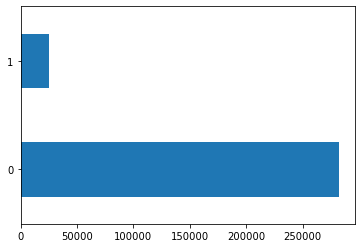

In [62]:
app_data['TARGET'].value_counts().plot(kind='barh')

In [63]:
app_data['TARGET'].value_counts()*100/len(app_data['TARGET'].index)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [64]:
# only 8% of clients have difficulties in paying loan

In [65]:
app_data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
categorical_data={i for i in app_data.select_dtypes(include=object)}

In [67]:
categorical_data=[i for i in app_data.select_dtypes(include=object)]

In [68]:
categorical_data

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [69]:
numerical_data=[i for i in app_data.select_dtypes(include=np.number)]

In [70]:
numerical_data

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREA

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

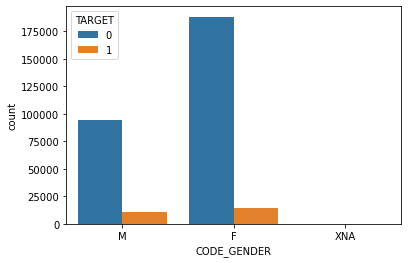

In [71]:
# categorical data analysis by Target
# distribution of gender
sns.countplot(data=app_data,x=app_data['CODE_GENDER'],hue='TARGET')


In [72]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [73]:
app_data['CODE_GENDER'].value_counts()*100/len(app_data['CODE_GENDER'].index)

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [74]:
# its mildly imbalance data. from taget bargraph we have seen that only 8% clients have difficulties in paying loan. n from code gender distribution we can see that 
# female clients have slight more difficulties in paying loan than male clients


In [75]:
app_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

<AxesSubplot:>

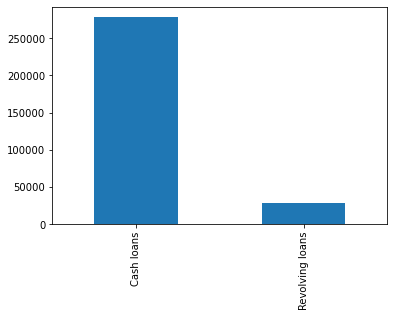

In [76]:
app_data['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')

In [77]:
# most of the clients are applying for cash loans


In [78]:
app_data['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

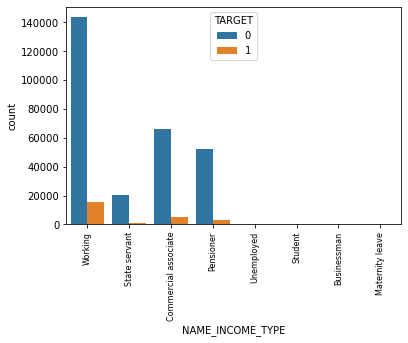

In [79]:
sns.countplot(data=app_data,x=app_data['NAME_INCOME_TYPE'],hue='TARGET')
plt.xticks(rotation =90,fontsize =8)
plt.show()


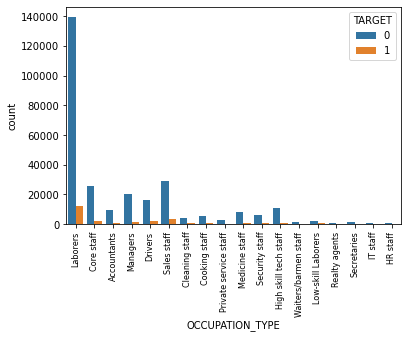

In [80]:

sns.countplot(data=app_data,x=app_data['OCCUPATION_TYPE'],hue='TARGET')
plt.xticks(rotation =90,fontsize =8)
plt.show()

In [81]:
#labourers will have more difficulties in payment of loan than IT staff or HR staff

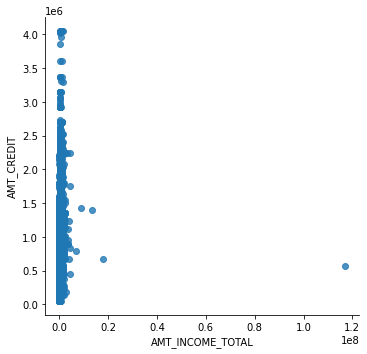

In [86]:
sns.lmplot(data=app_data, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', fit_reg=False)

In [88]:
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [125]:
#Yeah, actually the loan taken also affects the Annuity. So here the loan taken by the max income person was less, hence the less annuity. I had not checked that before.
app_data['AMT_INCOME_TOTAL'].max()

117000000.0

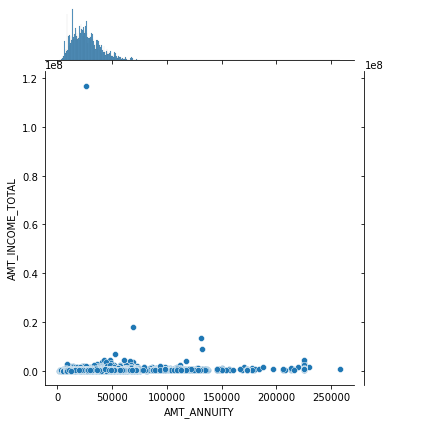

In [102]:

sns.jointplot( x='AMT_ANNUITY', y='AMT_INCOME_TOTAL',data=app_data)

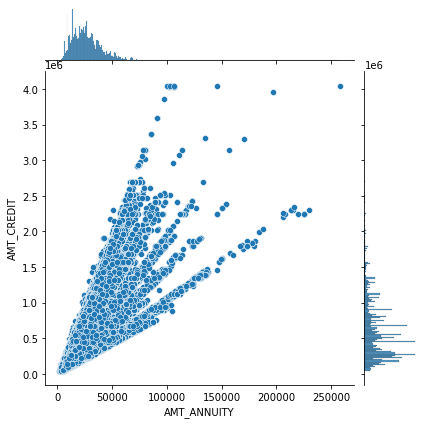

In [107]:
# amount_annuity will be more for more credit loan
sns.jointplot( x='AMT_ANNUITY', y='AMT_CREDIT',data=app_data)

C:\Users\Shail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

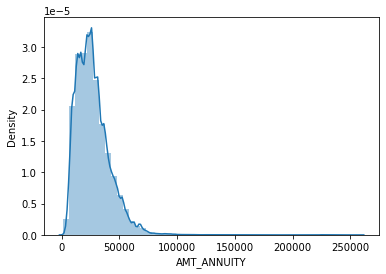

In [106]:
sns.distplot(app_data['AMT_ANNUITY'],kde=True)

In [ ]:
# prev_data

In [4]:
prev_data=pd.read_csv("previous_application.csv")

In [5]:
prev_data.shape

(1670214, 37)

In [6]:
prev_data.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [7]:
# too many empty values
prev_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [8]:
round(100*(prev_data.isnull().sum()/len(prev_data.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [9]:
miss_value = pd.DataFrame((prev_data.isnull().sum())*100/prev_data.shape[0])
miss_value

,0
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000


In [10]:
miss_value = pd.DataFrame(round((prev_data.isnull().sum())*100/prev_data.shape[0],2)).reset_index()
miss_value.columns=['columns','per_miss_value']
miss_value

,columns,per_miss_value
0,SK_ID_PREV,0.00
1,SK_ID_CURR,0.00
2,NAME_CONTRACT_TYPE,0.00
3,AMT_ANNUITY,22.29
4,AMT_APPLICATION,0.00
5,AMT_CREDIT,0.00
6,AMT_DOWN_PAYMENT,53.64
7,AMT_GOODS_PRICE,23.08
8,WEEKDAY_APPR_PROCESS_START,0.00
9,HOUR_APPR_PROCESS_START,0.00


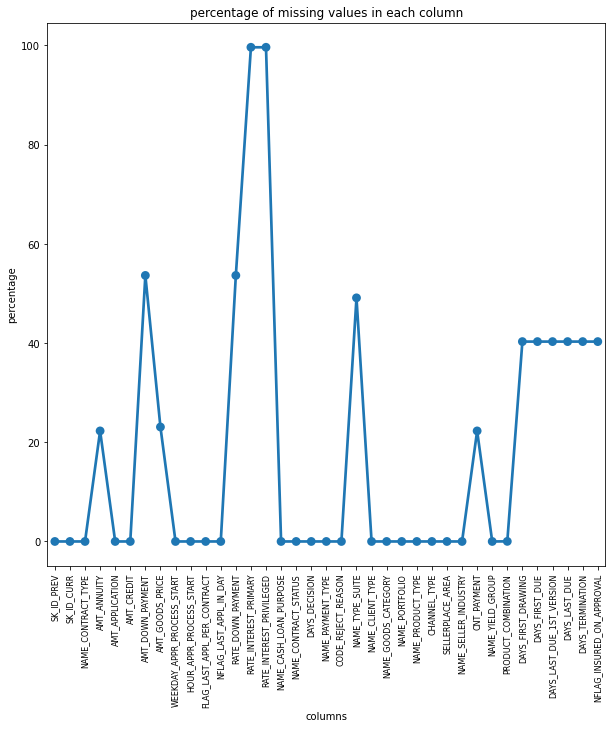

In [11]:
fig = plt.figure(figsize=(10,10))

ax=sns.pointplot(x="columns",y='per_miss_value',data=miss_value)
plt.xticks(rotation =90,fontsize =8)
ax.set(xlabel="columns",ylabel="percentage")
plt.title("percentage of missing values in each column")
plt.show()

In [ ]:
#deleting columns having 50% missing values.

In [13]:
prev_data= prev_data.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1)

In [14]:
prev_data.shape

(1670214, 33)

In [17]:
prev_data['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

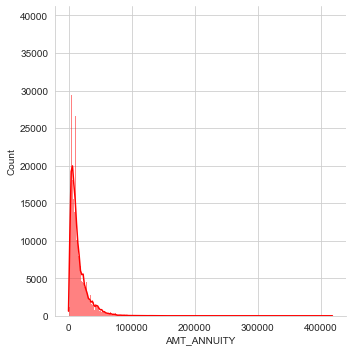

In [25]:
sns.set_style('whitegrid')
sns.displot(prev_data['AMT_ANNUITY'], kde = True, color ='red')

C:\Users\Shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_ANNUITY'>

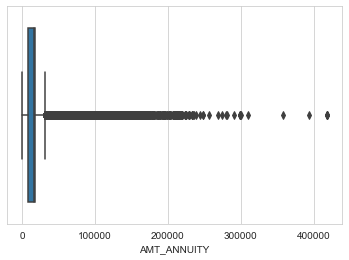

In [31]:
sns.boxplot(prev_data['AMT_ANNUITY'])

In [26]:

#amount of innuity paid is in the range <10000
x=prev_data['AMT_ANNUITY'].mean()

prev_data['AMT_ANNUITY']=prev_data['AMT_ANNUITY'].fillna(x)


In [27]:
prev_data['AMT_ANNUITY'].isnull().sum()

0

In [32]:
prev_data['NAME_TYPE_SUITE'].describe()

count            849809
unique                7
top       Unaccompanied
freq             508970
Name: NAME_TYPE_SUITE, dtype: object

In [33]:
prev_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

<AxesSubplot:xlabel='NAME_TYPE_SUITE', ylabel='count'>

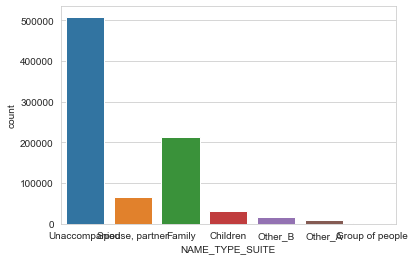

In [35]:
sns.countplot(x=prev_data['NAME_TYPE_SUITE'])

In [53]:
prev_data=prev_data.drop('NAME_TYPE_SUITE',axis=1)

In [55]:
prev_data['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

C:\Users\Shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

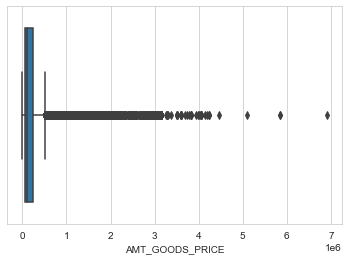

In [56]:
sns.boxplot(prev_data['AMT_GOODS_PRICE'] )

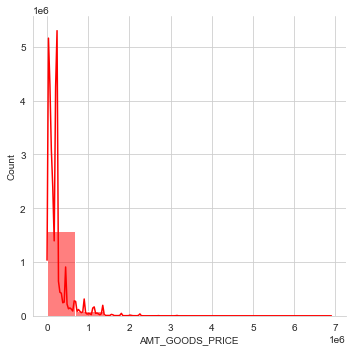

In [66]:
sns.displot(prev_data['AMT_GOODS_PRICE'], kde = True, color ='red',bins=10)

In [59]:
x=prev_data['AMT_GOODS_PRICE'].mean()
prev_data['AMT_GOODS_PRICE']=prev_data['AMT_GOODS_PRICE'].fillna(x)

In [60]:
prev_data['AMT_GOODS_PRICE'].isnull().sum()

0

In [61]:
prev_data['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

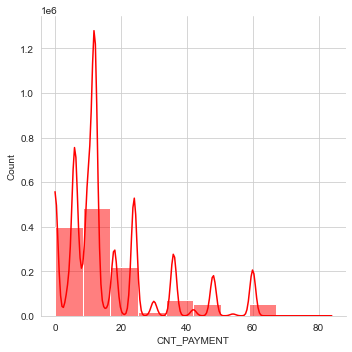

In [64]:
sns.displot(prev_data['CNT_PAYMENT'], kde = True, color ='red',bins=10)

C:\Users\Shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_PAYMENT'>

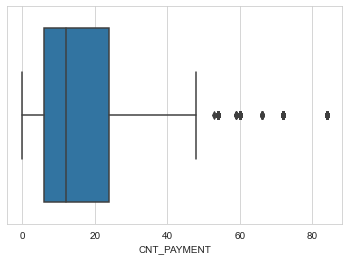

In [68]:
sns.boxplot(prev_data['CNT_PAYMENT'])

In [69]:
x=prev_data['CNT_PAYMENT'].median()
prev_data['CNT_PAYMENT']=prev_data['CNT_PAYMENT'].fillna(x)


In [72]:
prev_data['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

C:\Users\Shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


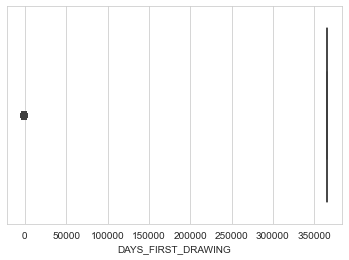

In [73]:
sns.boxplot(prev_data['DAYS_FIRST_DRAWING'])
plt.show()

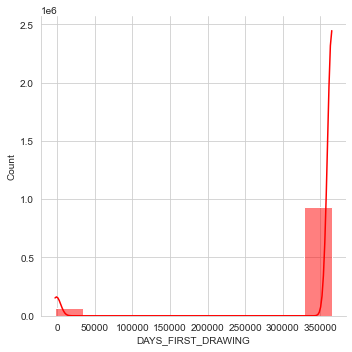

In [74]:
sns.displot(prev_data['DAYS_FIRST_DRAWING'], kde = True, color ='red',bins=10)

In [75]:
x=prev_data['DAYS_FIRST_DRAWING'].median()
prev_data['DAYS_FIRST_DRAWING']=prev_data['DAYS_FIRST_DRAWING'].fillna(x)

In [76]:
prev_data['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

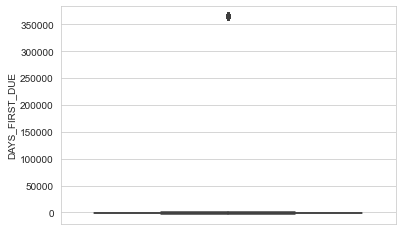

In [77]:
sns.boxplot(y=prev_data['DAYS_FIRST_DUE'])
plt.show()

In [80]:
x=prev_data['DAYS_FIRST_DUE'].median()
prev_data['DAYS_FIRST_DUE']=prev_data['DAYS_FIRST_DUE'].fillna(x)

In [79]:
prev_data['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

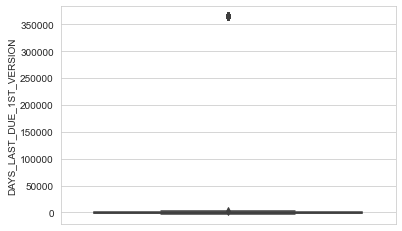

In [81]:
sns.boxplot(y=prev_data['DAYS_LAST_DUE_1ST_VERSION'])
plt.show()

In [82]:
x=prev_data['DAYS_LAST_DUE_1ST_VERSION'].median()
prev_data['DAYS_LAST_DUE_1ST_VERSION']=prev_data['DAYS_LAST_DUE_1ST_VERSION'].fillna(x)

In [83]:
prev_data['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

C:\Users\Shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


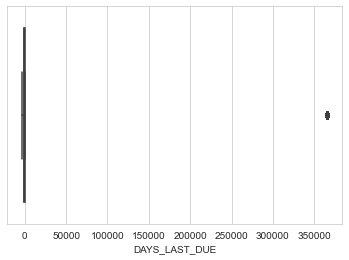

In [84]:
sns.boxplot(prev_data['DAYS_LAST_DUE'])
plt.show()

In [85]:
x=prev_data['DAYS_LAST_DUE'].median()
prev_data['DAYS_LAST_DUE']=prev_data['DAYS_LAST_DUE'].fillna(x)

In [86]:
prev_data['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [87]:
x=prev_data['DAYS_TERMINATION'].median()
prev_data['DAYS_TERMINATION']=prev_data['DAYS_TERMINATION'].fillna(x)

In [88]:
prev_data['NFLAG_INSURED_ON_APPROVAL'].describe()

count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [90]:
x=prev_data['NFLAG_INSURED_ON_APPROVAL'].median()
prev_data['NFLAG_INSURED_ON_APPROVAL']=prev_data['NFLAG_INSURED_ON_APPROVAL'].fillna(x)

In [91]:
round(100*(prev_data.isnull().sum()/len(prev_data.index)),2)

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                    0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                    0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
DAYS_FIRST_DRAWING             0.00
DAYS_FIRST_DUE              